In [146]:
import pymysql

In [147]:
connection = pymysql.connect(host='localhost',
                                                        user = 'root',
                                                        password='',
                                                        db='pi_sensor',
                                                        charset='utf8',
                                                        cursorclass=pymysql.cursors.DictCursor)

In [148]:
connection.commit()

In [149]:
cur = connection.cursor()

In [150]:
cur.execute('select * from temp_values')

13

In [151]:
rows = cur.fetchall()

In [152]:
rows

[{'date': datetime.date(2017, 4, 8), 'hour': 6},
 {'date': datetime.date(2017, 4, 9), 'hour': 148},
 {'date': datetime.date(2017, 4, 10), 'hour': 565},
 {'date': datetime.date(2017, 4, 11), 'hour': 1007},
 {'date': datetime.date(2017, 4, 12), 'hour': 843},
 {'date': datetime.date(2017, 4, 13), 'hour': 631},
 {'date': datetime.date(2017, 4, 15), 'hour': 364},
 {'date': datetime.date(2017, 4, 16), 'hour': 2330},
 {'date': datetime.date(2017, 4, 17), 'hour': 1137},
 {'date': datetime.date(2017, 4, 18), 'hour': 1},
 {'date': datetime.date(2017, 4, 19), 'hour': 1038},
 {'date': datetime.date(2017, 4, 21), 'hour': 1357},
 {'date': datetime.date(2017, 4, 24), 'hour': 1949}]

In [153]:
%matplotlib inline

In [154]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [155]:
frame = DataFrame(rows)

In [156]:
frame

,date,hour
0,2017-04-08,6
1,2017-04-09,148
2,2017-04-10,565
3,2017-04-11,1007
4,2017-04-12,843
5,2017-04-13,631
6,2017-04-15,364
7,2017-04-16,2330
8,2017-04-17,1137
9,2017-04-18,1


In [157]:
frame['date'] = pd.to_datetime(frame['date'])

In [196]:
x = pd.date_range('2017-04-08', periods=30, freq='d')

In [197]:
x = pd.DataFrame(x)

In [198]:
x.columns=['date']

In [199]:
merged = pd.merge(x, frame, left_on=['date'], right_on=['date'], how='outer')

In [200]:
merged

,date,hour
0,2017-04-08,6.0
1,2017-04-09,148.0
2,2017-04-10,565.0
3,2017-04-11,1007.0
4,2017-04-12,843.0
5,2017-04-13,631.0
6,2017-04-14,NaN
7,2017-04-15,364.0
8,2017-04-16,2330.0
9,2017-04-17,1137.0


In [185]:
hours = np.array(merged['hour'])

In [186]:
hours

array([  6.00000000e+00,   1.48000000e+02,   5.65000000e+02,
         1.00700000e+03,   8.43000000e+02,   6.31000000e+02,
                    nan,   3.64000000e+02,   2.33000000e+03,
         1.13700000e+03,   1.00000000e+00,   1.03800000e+03,
                    nan,   1.35700000e+03,              nan,
                    nan,   1.94900000e+03,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan])

In [187]:
ts = pd.Series(hours, index=merged['date'])

In [188]:
ts

date
2017-04-08       6.0
2017-04-09     148.0
2017-04-10     565.0
2017-04-11    1007.0
2017-04-12     843.0
2017-04-13     631.0
2017-04-14       NaN
2017-04-15     364.0
2017-04-16    2330.0
2017-04-17    1137.0
2017-04-18       1.0
2017-04-19    1038.0
2017-04-20       NaN
2017-04-21    1357.0
2017-04-22       NaN
2017-04-23       NaN
2017-04-24    1949.0
2017-04-25       NaN
2017-04-26       NaN
2017-04-27       NaN
2017-04-28       NaN
2017-04-29       NaN
2017-04-30       NaN
2017-05-01       NaN
2017-05-02       NaN
2017-05-03       NaN
2017-05-04       NaN
2017-05-05       NaN
2017-05-06       NaN
2017-05-07       NaN
dtype: float64

In [189]:
df = DataFrame(ts)

In [190]:
df.columns = ['*10 [sec]']

In [191]:
df

,*10 [sec]
date,
2017-04-08,6.0
2017-04-09,148.0
2017-04-10,565.0
2017-04-11,1007.0
2017-04-12,843.0
2017-04-13,631.0
2017-04-14,NaN
2017-04-15,364.0
2017-04-16,2330.0


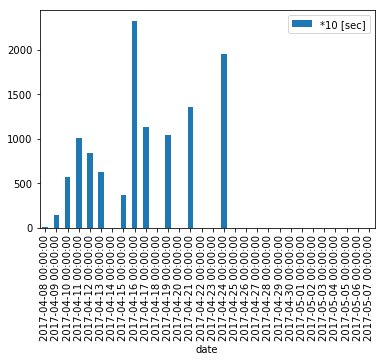

In [201]:
df.plot(kind='bar')

In [203]:
df.index.format()

['2017-04-08',
 '2017-04-09',
 '2017-04-10',
 '2017-04-11',
 '2017-04-12',
 '2017-04-13',
 '2017-04-14',
 '2017-04-15',
 '2017-04-16',
 '2017-04-17',
 '2017-04-18',
 '2017-04-19',
 '2017-04-20',
 '2017-04-21',
 '2017-04-22',
 '2017-04-23',
 '2017-04-24',
 '2017-04-25',
 '2017-04-26',
 '2017-04-27',
 '2017-04-28',
 '2017-04-29',
 '2017-04-30',
 '2017-05-01',
 '2017-05-02',
 '2017-05-03',
 '2017-05-04',
 '2017-05-05',
 '2017-05-06',
 '2017-05-07']

In [204]:
df.index = df.index.format()

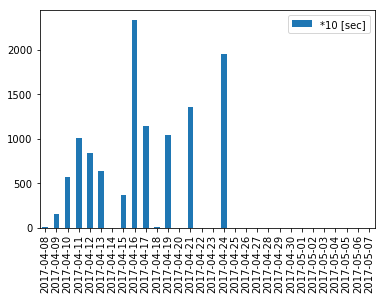

In [205]:
df.plot(kind='bar')

In [193]:
merged.columns = ['date', '*10 [sec]']

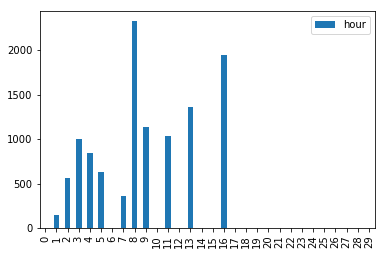

In [208]:
merged.plot(kind='bar')

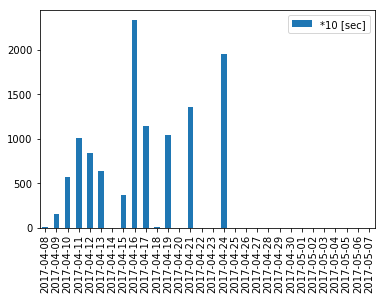

In [207]:
df.plot(kind='bar')